In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
df = pd.read_csv("dataset.csv", delimiter=';', low_memory=False)

In [3]:
df.isnull().sum()

BillNo             0
Itemname        1452
Quantity           0
Date               0
Price              0
CustomerID    133427
Country            0
dtype: int64

In [11]:
# Step 1: Clean karna (optional but recommended)
df = df.dropna(subset=['BillNo', 'Itemname'])
df = df.dropna(subset=['BillNo', 'CustomerID'])
df = df[df['Quantity'] > 0]

In [12]:
# Convert Price from comma to dot and to float
# Ensure all values are strings before using str.replace
df["Price"] = df["Price"].astype(str).str.replace(",", ".").astype(float)

In [19]:
# 1. Count how many times each item appears
# Count how many times each item appears
item_counts = df['Itemname'].value_counts()


In [26]:
# Filter items that appear more than 1000 times
common_items = item_counts[item_counts > 500].index

In [27]:
# 3. Filter the data to include only those common items
df_filtered = df[df['Itemname'].isin(common_items)]

In [28]:
 #Group data by BillNo and Itemname, then sum quantities
basket = df_filtered.groupby(['BillNo', 'Itemname'])['Quantity'].sum().unstack().fillna(0)


In [29]:
# Convert quantities to 1/0 (presence/absence)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

C:\Users\rk871\AppData\Local\Temp\ipykernel_2640\905283704.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)


In [30]:
#Running the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)

C:\Users\rk871\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [31]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

In [32]:
# 6. Display top rules
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by='lift', ascending=False).head(10))

                                            antecedents  \
1209  (ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY...   
1208  (GREEN REGENCY TEACUP AND SAUCER, REGENCY CAKE...   
1207  (GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...   
1210  (PINK REGENCY TEACUP AND SAUCER, REGENCY CAKES...   
1213                   (PINK REGENCY TEACUP AND SAUCER)   
1204  (GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...   
1205  (ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY...   
1212                  (GREEN REGENCY TEACUP AND SAUCER)   
600                    (PINK REGENCY TEACUP AND SAUCER)   
597   (GREEN REGENCY TEACUP AND SAUCER, REGENCY CAKE...   

                                            consequents   support  confidence  \
1209  (GREEN REGENCY TEACUP AND SAUCER, REGENCY CAKE...  0.014361    0.535627   
1208  (ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY...  0.014361    0.628242   
1207  (PINK REGENCY TEACUP AND SAUCER, REGENCY CAKES...  0.014361    0.431683   
1210  (GREEN REGENCY TEACU

In [37]:
rules.to_csv("top_rules.csv", index=False)


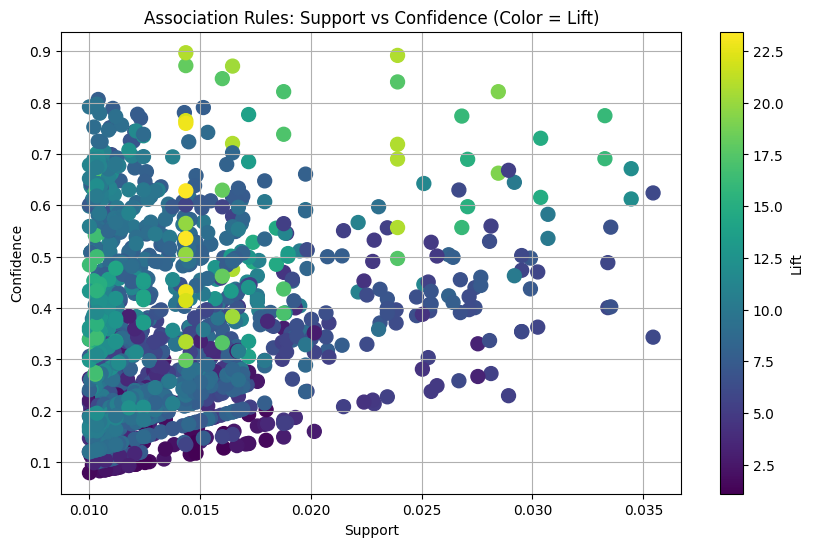

In [34]:
import matplotlib.pyplot as plt

# Scatter plot of rules
plt.figure(figsize=(10,6))
plt.scatter(rules['support'], rules['confidence'], c=rules['lift'], cmap='viridis', s=100)
plt.colorbar(label='Lift')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules: Support vs Confidence (Color = Lift)')
plt.grid(True)
plt.show()


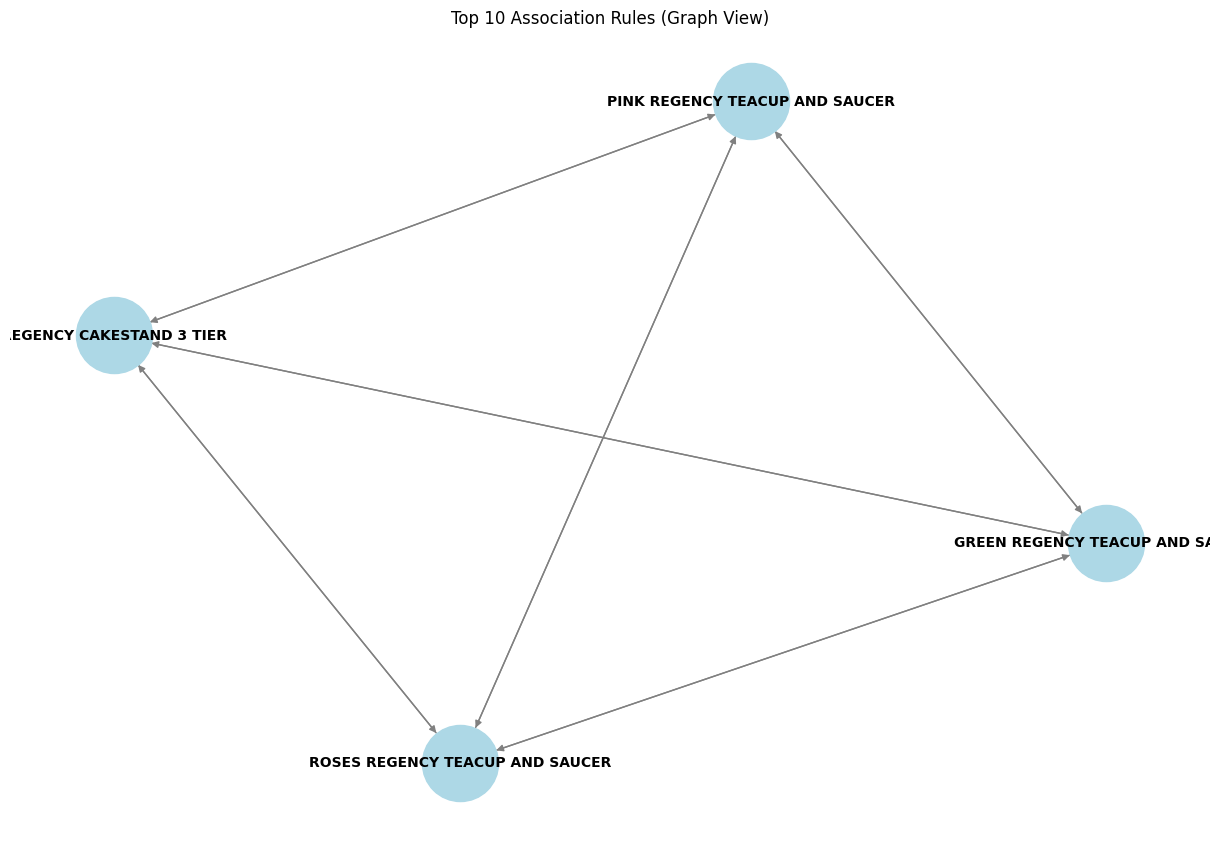

In [35]:
import networkx as nx
import matplotlib.pyplot as plt

# Take top 10 rules
top_rules = rules.sort_values(by='lift', ascending=False).head(10)

# Create graph
G = nx.DiGraph()

for _, row in top_rules.iterrows():
    for ant in row['antecedents']:
        for cons in row['consequents']:
            G.add_edge(ant, cons, weight=row['lift'])

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=1)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray')
plt.title('Top 10 Association Rules (Graph View)')
plt.show()
